In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 1024.", name="epoch 1000")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(1024, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=1000, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1024)              4206592   
                                                                 
 dense (Dense)               (None, 25)                25625     
                                                                 
Total params: 4,232,217
Trainable params: 4,232,217
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/1000
2/5 [===========>..................] - ETA: 0s - loss: 1.1090 - mae: 0.9739 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 13s 1s/step - loss: 0.9683 - mae: 0.8965 - val_loss: 0.9686 - val_mae: 0.9002
Epoch 2/1000
3/5 [=================>............] - ETA: 0s - loss: 0.9490 - mae: 0.8889

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.7750 - mae: 0.7689 - val_loss: 0.2404 - val_mae: 0.4000
Epoch 3/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2703 - mae: 0.4342

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.2250 - mae: 0.3866 - val_loss: 0.2197 - val_mae: 0.3842
Epoch 4/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2159 - mae: 0.3731

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1860 - mae: 0.3546 - val_loss: 0.1867 - val_mae: 0.3565
Epoch 5/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1911 - mae: 0.3608

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.1895 - mae: 0.3593 - val_loss: 0.1662 - val_mae: 0.3391
Epoch 6/1000
5/5 [==============================] - 0s 103ms/step - loss: 0.1724 - mae: 0.3442 - val_loss: 0.1745 - val_mae: 0.3502
Epoch 7/1000
5/5 [==============================] - 0s 84ms/step - loss: 0.1728 - mae: 0.3428 - val_loss: 0.1676 - val_mae: 0.3416
Epoch 8/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1542 - mae: 0.3296

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1640 - mae: 0.3358 - val_loss: 0.1585 - val_mae: 0.3312
Epoch 9/1000
3/5 [=================>............] - ETA: 0s - loss: 0.1613 - mae: 0.3320

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1599 - mae: 0.3316 - val_loss: 0.1526 - val_mae: 0.3275
Epoch 10/1000
5/5 [==============================] - 1s 118ms/step - loss: 0.1532 - mae: 0.3243 - val_loss: 0.1534 - val_mae: 0.3236
Epoch 11/1000
5/5 [==============================] - ETA: 0s - loss: 0.1484 - mae: 0.3177

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1484 - mae: 0.3177 - val_loss: 0.1384 - val_mae: 0.3078
Epoch 12/1000
3/5 [=================>............] - ETA: 0s - loss: 0.1316 - mae: 0.2994

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1238 - mae: 0.2890 - val_loss: 0.1036 - val_mae: 0.2629
Epoch 13/1000
3/5 [=================>............] - ETA: 0s - loss: 0.1963 - mae: 0.3744

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.2s


5/5 [==============================] - 4s 1s/step - loss: 0.2028 - mae: 0.3763 - val_loss: 0.1009 - val_mae: 0.2614
Epoch 14/1000
5/5 [==============================] - 1s 133ms/step - loss: 0.1258 - mae: 0.2917 - val_loss: 0.1181 - val_mae: 0.2855
Epoch 15/1000
5/5 [==============================] - 0s 95ms/step - loss: 0.1317 - mae: 0.2935 - val_loss: 0.1089 - val_mae: 0.2741
Epoch 16/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1154 - mae: 0.2778

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1169 - mae: 0.2801 - val_loss: 0.0973 - val_mae: 0.2572
Epoch 17/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0965 - mae: 0.2545

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0906 - mae: 0.2447 - val_loss: 0.0703 - val_mae: 0.2113
Epoch 18/1000
5/5 [==============================] - ETA: 0s - loss: 0.0661 - mae: 0.2015

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0661 - mae: 0.2015 - val_loss: 0.0578 - val_mae: 0.1854
Epoch 19/1000
5/5 [==============================] - 1s 115ms/step - loss: 0.0648 - mae: 0.1985 - val_loss: 0.0621 - val_mae: 0.1889
Epoch 20/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0660 - mae: 0.1990

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0603 - mae: 0.1890 - val_loss: 0.0568 - val_mae: 0.1817
Epoch 21/1000
5/5 [==============================] - 1s 113ms/step - loss: 0.0597 - mae: 0.1877 - val_loss: 0.0578 - val_mae: 0.1847
Epoch 22/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0570 - mae: 0.1841

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0590 - mae: 0.1866 - val_loss: 0.0560 - val_mae: 0.1806
Epoch 23/1000
5/5 [==============================] - 1s 119ms/step - loss: 0.0570 - mae: 0.1834 - val_loss: 0.0569 - val_mae: 0.1816
Epoch 24/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0573 - mae: 0.1837 - val_loss: 0.0562 - val_mae: 0.1817
Epoch 25/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0568 - mae: 0.1812

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0569 - mae: 0.1829 - val_loss: 0.0557 - val_mae: 0.1793
Epoch 26/1000
5/5 [==============================] - 0s 97ms/step - loss: 0.0572 - mae: 0.1830 - val_loss: 0.0558 - val_mae: 0.1813
Epoch 27/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0566 - mae: 0.1819 - val_loss: 0.0563 - val_mae: 0.1821
Epoch 28/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0532 - mae: 0.1774

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0578 - mae: 0.1844 - val_loss: 0.0556 - val_mae: 0.1797
Epoch 29/1000
5/5 [==============================] - 1s 117ms/step - loss: 0.0569 - mae: 0.1823 - val_loss: 0.0559 - val_mae: 0.1824
Epoch 30/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0577 - mae: 0.1842 - val_loss: 0.0560 - val_mae: 0.1819
Epoch 31/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0572 - mae: 0.1825 - val_loss: 0.0585 - val_mae: 0.1884
Epoch 32/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0575 - mae: 0.1833 - val_loss: 0.0573 - val_mae: 0.1847
Epoch 33/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0555 - mae: 0.1826

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0578 - mae: 0.1837 - val_loss: 0.0556 - val_mae: 0.1804
Epoch 34/1000
5/5 [==============================] - 1s 115ms/step - loss: 0.0570 - mae: 0.1830 - val_loss: 0.0563 - val_mae: 0.1810
Epoch 35/1000
5/5 [==============================] - 0s 77ms/step - loss: 0.0574 - mae: 0.1834 - val_loss: 0.0582 - val_mae: 0.1830
Epoch 36/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0592 - mae: 0.1869 - val_loss: 0.0638 - val_mae: 0.1922
Epoch 37/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0638 - mae: 0.1952 - val_loss: 0.0582 - val_mae: 0.1845
Epoch 38/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0604 - mae: 0.1887 - val_loss: 0.0581 - val_mae: 0.1849
Epoch 39/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0519 - mae: 0.1753

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0614 - mae: 0.1906 - val_loss: 0.0555 - val_mae: 0.1797
Epoch 40/1000
5/5 [==============================] - 0s 100ms/step - loss: 0.0625 - mae: 0.1928 - val_loss: 0.0556 - val_mae: 0.1803
Epoch 41/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0620 - mae: 0.1918 - val_loss: 0.0585 - val_mae: 0.1877
Epoch 42/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0617 - mae: 0.1913 - val_loss: 0.0586 - val_mae: 0.1877
Epoch 43/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0582 - mae: 0.1848 - val_loss: 0.0586 - val_mae: 0.1894
Epoch 44/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0582 - mae: 0.1855 - val_loss: 0.0566 - val_mae: 0.1847
Epoch 45/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0569 - mae: 0.1832 - val_loss: 0.0584 - val_mae: 0.1888
Epoch 46/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0576 - mae: 0.1

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0552 - mae: 0.1791 - val_loss: 0.0550 - val_mae: 0.1806
Epoch 64/1000
5/5 [==============================] - 1s 115ms/step - loss: 0.0562 - mae: 0.1813 - val_loss: 0.0557 - val_mae: 0.1803
Epoch 65/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0555 - mae: 0.1800 - val_loss: 0.0578 - val_mae: 0.1863
Epoch 66/1000
5/5 [==============================] - 0s 77ms/step - loss: 0.0570 - mae: 0.1832 - val_loss: 0.0589 - val_mae: 0.1899
Epoch 67/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0592 - mae: 0.1879 - val_loss: 0.0587 - val_mae: 0.1886
Epoch 68/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0580 - mae: 0.1850 - val_loss: 0.0565 - val_mae: 0.1831
Epoch 69/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0554 - mae: 0.1794

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0571 - mae: 0.1829 - val_loss: 0.0545 - val_mae: 0.1776
Epoch 70/1000
5/5 [==============================] - 1s 106ms/step - loss: 0.0560 - mae: 0.1812 - val_loss: 0.0566 - val_mae: 0.1815
Epoch 71/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0556 - mae: 0.1813 - val_loss: 0.0550 - val_mae: 0.1786
Epoch 72/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0552 - mae: 0.1800 - val_loss: 0.0559 - val_mae: 0.1802
Epoch 73/1000
5/5 [==============================] - 0s 77ms/step - loss: 0.0551 - mae: 0.1799 - val_loss: 0.0631 - val_mae: 0.1893
Epoch 74/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0602 - mae: 0.1900 - val_loss: 0.0568 - val_mae: 0.1812
Epoch 75/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0570 - mae: 0.1833 - val_loss: 0.0575 - val_mae: 0.1816
Epoch 76/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0572 - mae: 0.1

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0537 - mae: 0.1774 - val_loss: 0.0538 - val_mae: 0.1782
Epoch 93/1000
5/5 [==============================] - 1s 109ms/step - loss: 0.0532 - mae: 0.1769 - val_loss: 0.0545 - val_mae: 0.1796
Epoch 94/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0532 - mae: 0.1766 - val_loss: 0.0543 - val_mae: 0.1783
Epoch 95/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0506 - mae: 0.1723

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0531 - mae: 0.1759 - val_loss: 0.0537 - val_mae: 0.1770
Epoch 96/1000
5/5 [==============================] - 1s 112ms/step - loss: 0.0526 - mae: 0.1750 - val_loss: 0.0544 - val_mae: 0.1795
Epoch 97/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0529 - mae: 0.1759 - val_loss: 0.0561 - val_mae: 0.1849
Epoch 98/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0555 - mae: 0.1810 - val_loss: 0.0609 - val_mae: 0.1955
Epoch 99/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0570 - mae: 0.1852 - val_loss: 0.0581 - val_mae: 0.1891
Epoch 100/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0599 - mae: 0.1921

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0546 - mae: 0.1793 - val_loss: 0.0530 - val_mae: 0.1768
Epoch 101/1000
5/5 [==============================] - 0s 99ms/step - loss: 0.0524 - mae: 0.1756 - val_loss: 0.0531 - val_mae: 0.1772
Epoch 102/1000
5/5 [==============================] - ETA: 0s - loss: 0.0511 - mae: 0.1739

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0511 - mae: 0.1739 - val_loss: 0.0529 - val_mae: 0.1756
Epoch 103/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0504 - mae: 0.1731

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0517 - mae: 0.1749 - val_loss: 0.0528 - val_mae: 0.1762
Epoch 104/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0503 - mae: 0.1717

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0511 - mae: 0.1735 - val_loss: 0.0516 - val_mae: 0.1742
Epoch 105/1000
5/5 [==============================] - 1s 101ms/step - loss: 0.0501 - mae: 0.1725 - val_loss: 0.0529 - val_mae: 0.1750
Epoch 106/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0498 - mae: 0.1722 - val_loss: 0.0526 - val_mae: 0.1754
Epoch 107/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0514 - mae: 0.1755 - val_loss: 0.0520 - val_mae: 0.1756
Epoch 108/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0547 - mae: 0.1779

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0491 - mae: 0.1714 - val_loss: 0.0508 - val_mae: 0.1732
Epoch 109/1000
5/5 [==============================] - 1s 107ms/step - loss: 0.0505 - mae: 0.1739 - val_loss: 0.0515 - val_mae: 0.1753
Epoch 110/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0490 - mae: 0.1717 - val_loss: 0.0508 - val_mae: 0.1750
Epoch 111/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0481 - mae: 0.1694 - val_loss: 0.0539 - val_mae: 0.1832
Epoch 112/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0501 - mae: 0.1748 - val_loss: 0.0556 - val_mae: 0.1852
Epoch 113/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0538 - mae: 0.1786

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0556 - mae: 0.1827 - val_loss: 0.0492 - val_mae: 0.1728
Epoch 114/1000
5/5 [==============================] - 1s 112ms/step - loss: 0.0497 - mae: 0.1709 - val_loss: 0.0511 - val_mae: 0.1755
Epoch 115/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0481 - mae: 0.1690 - val_loss: 0.0533 - val_mae: 0.1778
Epoch 116/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0419 - mae: 0.1582

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0515 - mae: 0.1752 - val_loss: 0.0477 - val_mae: 0.1674
Epoch 117/1000
5/5 [==============================] - 1s 121ms/step - loss: 0.0475 - mae: 0.1679 - val_loss: 0.0500 - val_mae: 0.1731
Epoch 118/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0489 - mae: 0.1698

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0465 - mae: 0.1660 - val_loss: 0.0462 - val_mae: 0.1648
Epoch 119/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0463 - mae: 0.1665

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0458 - mae: 0.1647 - val_loss: 0.0459 - val_mae: 0.1660
Epoch 120/1000
5/5 [==============================] - 1s 120ms/step - loss: 0.0446 - mae: 0.1631 - val_loss: 0.0466 - val_mae: 0.1673
Epoch 121/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0443 - mae: 0.1672

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0451 - mae: 0.1634 - val_loss: 0.0454 - val_mae: 0.1645
Epoch 122/1000
5/5 [==============================] - 0s 89ms/step - loss: 0.0455 - mae: 0.1639 - val_loss: 0.0462 - val_mae: 0.1661
Epoch 123/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0446 - mae: 0.1628 - val_loss: 0.0462 - val_mae: 0.1654
Epoch 124/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0443 - mae: 0.1611 - val_loss: 0.0456 - val_mae: 0.1641
Epoch 125/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0419 - mae: 0.1549

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 970ms/step - loss: 0.0441 - mae: 0.1618 - val_loss: 0.0450 - val_mae: 0.1644
Epoch 126/1000
5/5 [==============================] - 0s 100ms/step - loss: 0.0437 - mae: 0.1603 - val_loss: 0.0475 - val_mae: 0.1663
Epoch 127/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0458 - mae: 0.1647 - val_loss: 0.0465 - val_mae: 0.1672
Epoch 128/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0451 - mae: 0.1635 - val_loss: 0.0462 - val_mae: 0.1664
Epoch 129/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0447 - mae: 0.1632 - val_loss: 0.0459 - val_mae: 0.1650
Epoch 130/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0457 - mae: 0.1645

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0429 - mae: 0.1589 - val_loss: 0.0437 - val_mae: 0.1617
Epoch 131/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0432 - mae: 0.1606

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0430 - mae: 0.1595 - val_loss: 0.0436 - val_mae: 0.1621
Epoch 132/1000
5/5 [==============================] - 0s 93ms/step - loss: 0.0423 - mae: 0.1584 - val_loss: 0.0438 - val_mae: 0.1608
Epoch 133/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0409 - mae: 0.1547

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 968ms/step - loss: 0.0418 - mae: 0.1571 - val_loss: 0.0428 - val_mae: 0.1601
Epoch 134/1000
5/5 [==============================] - 0s 100ms/step - loss: 0.0419 - mae: 0.1570 - val_loss: 0.0443 - val_mae: 0.1636
Epoch 135/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0422 - mae: 0.1584 - val_loss: 0.0440 - val_mae: 0.1626
Epoch 136/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0425 - mae: 0.1583

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0406 - mae: 0.1539 - val_loss: 0.0401 - val_mae: 0.1552
Epoch 137/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0385 - mae: 0.1510

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0396 - mae: 0.1524 - val_loss: 0.0381 - val_mae: 0.1510
Epoch 138/1000
5/5 [==============================] - 1s 128ms/step - loss: 0.0388 - mae: 0.1521 - val_loss: 0.0394 - val_mae: 0.1489
Epoch 139/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0409 - mae: 0.1526

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0376 - mae: 0.1493 - val_loss: 0.0368 - val_mae: 0.1458
Epoch 140/1000
5/5 [==============================] - ETA: 0s - loss: 0.0361 - mae: 0.1460

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0361 - mae: 0.1460 - val_loss: 0.0356 - val_mae: 0.1436
Epoch 141/1000
5/5 [==============================] - 1s 126ms/step - loss: 0.0352 - mae: 0.1435 - val_loss: 0.0390 - val_mae: 0.1528
Epoch 142/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0335 - mae: 0.1407

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0359 - mae: 0.1461 - val_loss: 0.0350 - val_mae: 0.1431
Epoch 143/1000
5/5 [==============================] - 0s 100ms/step - loss: 0.0333 - mae: 0.1396 - val_loss: 0.0351 - val_mae: 0.1453
Epoch 144/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0326 - mae: 0.1377 - val_loss: 0.0355 - val_mae: 0.1436
Epoch 145/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0353 - mae: 0.1460

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 958ms/step - loss: 0.0328 - mae: 0.1386 - val_loss: 0.0329 - val_mae: 0.1400
Epoch 146/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0320 - mae: 0.1381

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0318 - mae: 0.1380 - val_loss: 0.0317 - val_mae: 0.1351
Epoch 147/1000
5/5 [==============================] - 1s 75ms/step - loss: 0.0319 - mae: 0.1353 - val_loss: 0.0319 - val_mae: 0.1364
Epoch 148/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0274 - mae: 0.1256

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0308 - mae: 0.1330 - val_loss: 0.0311 - val_mae: 0.1356
Epoch 149/1000
5/5 [==============================] - 1s 119ms/step - loss: 0.0304 - mae: 0.1329 - val_loss: 0.0312 - val_mae: 0.1335
Epoch 150/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0304 - mae: 0.1323 - val_loss: 0.0318 - val_mae: 0.1347
Epoch 151/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0309 - mae: 0.1325

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0300 - mae: 0.1311 - val_loss: 0.0308 - val_mae: 0.1333
Epoch 152/1000
5/5 [==============================] - 1s 121ms/step - loss: 0.0296 - mae: 0.1305 - val_loss: 0.0309 - val_mae: 0.1318
Epoch 153/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0302 - mae: 0.1322 - val_loss: 0.0312 - val_mae: 0.1349
Epoch 154/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0299 - mae: 0.1324

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 968ms/step - loss: 0.0299 - mae: 0.1324 - val_loss: 0.0300 - val_mae: 0.1316
Epoch 155/1000
5/5 [==============================] - 1s 121ms/step - loss: 0.0293 - mae: 0.1296 - val_loss: 0.0308 - val_mae: 0.1355
Epoch 156/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0297 - mae: 0.1304 - val_loss: 0.0312 - val_mae: 0.1364
Epoch 157/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0297 - mae: 0.1301 - val_loss: 0.0314 - val_mae: 0.1364
Epoch 158/1000
5/5 [==============================] - 0s 77ms/step - loss: 0.0294 - mae: 0.1297 - val_loss: 0.0307 - val_mae: 0.1356
Epoch 159/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0298 - mae: 0.1316 - val_loss: 0.0300 - val_mae: 0.1334
Epoch 160/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0272 - mae: 0.1256

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0301 - mae: 0.1333 - val_loss: 0.0295 - val_mae: 0.1322
Epoch 161/1000
5/5 [==============================] - 1s 133ms/step - loss: 0.0301 - mae: 0.1333 - val_loss: 0.0311 - val_mae: 0.1365
Epoch 162/1000
5/5 [==============================] - 0s 95ms/step - loss: 0.0300 - mae: 0.1322 - val_loss: 0.0317 - val_mae: 0.1414
Epoch 163/1000
5/5 [==============================] - 0s 80ms/step - loss: 0.0302 - mae: 0.1333 - val_loss: 0.0312 - val_mae: 0.1375
Epoch 164/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0297 - mae: 0.1307 - val_loss: 0.0328 - val_mae: 0.1417
Epoch 165/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0295 - mae: 0.1343

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0304 - mae: 0.1324 - val_loss: 0.0285 - val_mae: 0.1305
Epoch 166/1000
5/5 [==============================] - 0s 105ms/step - loss: 0.0281 - mae: 0.1283 - val_loss: 0.0295 - val_mae: 0.1303
Epoch 167/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0281 - mae: 0.1291 - val_loss: 0.0287 - val_mae: 0.1286
Epoch 168/1000
5/5 [==============================] - 0s 78ms/step - loss: 0.0285 - mae: 0.1296 - val_loss: 0.0298 - val_mae: 0.1312
Epoch 169/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0301 - mae: 0.1292

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0279 - mae: 0.1282 - val_loss: 0.0280 - val_mae: 0.1261
Epoch 170/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0266 - mae: 0.1239

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0271 - mae: 0.1252 - val_loss: 0.0264 - val_mae: 0.1248
Epoch 171/1000
5/5 [==============================] - 1s 109ms/step - loss: 0.0264 - mae: 0.1251 - val_loss: 0.0268 - val_mae: 0.1246
Epoch 172/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0265 - mae: 0.1242

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 960ms/step - loss: 0.0256 - mae: 0.1231 - val_loss: 0.0262 - val_mae: 0.1235
Epoch 173/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0254 - mae: 0.1236

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0251 - mae: 0.1226 - val_loss: 0.0254 - val_mae: 0.1214
Epoch 174/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0241 - mae: 0.1199

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0244 - mae: 0.1210 - val_loss: 0.0252 - val_mae: 0.1199
Epoch 175/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0241 - mae: 0.1186

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0243 - mae: 0.1198 - val_loss: 0.0242 - val_mae: 0.1210
Epoch 176/1000
5/5 [==============================] - 1s 123ms/step - loss: 0.0238 - mae: 0.1197 - val_loss: 0.0265 - val_mae: 0.1279
Epoch 177/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0255 - mae: 0.1240 - val_loss: 0.0271 - val_mae: 0.1229
Epoch 178/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0249 - mae: 0.1213 - val_loss: 0.0262 - val_mae: 0.1201
Epoch 179/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0241 - mae: 0.1147

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0239 - mae: 0.1190 - val_loss: 0.0225 - val_mae: 0.1164
Epoch 180/1000
5/5 [==============================] - 0s 101ms/step - loss: 0.0226 - mae: 0.1162 - val_loss: 0.0235 - val_mae: 0.1194
Epoch 181/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0227 - mae: 0.1178 - val_loss: 0.0236 - val_mae: 0.1148
Epoch 182/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0221 - mae: 0.1148 - val_loss: 0.0380 - val_mae: 0.1414
Epoch 183/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0531 - mae: 0.1711 - val_loss: 0.1162 - val_mae: 0.2724
Epoch 184/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.1014 - mae: 0.2531 - val_loss: 0.0818 - val_mae: 0.2225
Epoch 185/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0797 - mae: 0.2177 - val_loss: 0.0936 - val_mae: 0.2473
Epoch 186/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0813 - m

Epoch 241/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0268 - mae: 0.1242 - val_loss: 0.0299 - val_mae: 0.1320
Epoch 242/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0266 - mae: 0.1232 - val_loss: 0.0293 - val_mae: 0.1294
Epoch 243/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0266 - mae: 0.1233 - val_loss: 0.0293 - val_mae: 0.1325
Epoch 244/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0273 - mae: 0.1246 - val_loss: 0.0294 - val_mae: 0.1322
Epoch 245/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0272 - mae: 0.1246 - val_loss: 0.0293 - val_mae: 0.1310
Epoch 246/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0266 - mae: 0.1240 - val_loss: 0.0289 - val_mae: 0.1300
Epoch 247/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0262 - mae: 0.1227 - val_loss: 0.0282 - val_mae: 0.1271
Epoch 248/1000
5/5 [==============================] - 0s 72ms/step - 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0191 - mae: 0.1074 - val_loss: 0.0214 - val_mae: 0.1154
Epoch 274/1000
5/5 [==============================] - 1s 126ms/step - loss: 0.0180 - mae: 0.1050 - val_loss: 0.0219 - val_mae: 0.1168
Epoch 275/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0178 - mae: 0.1043

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0176 - mae: 0.1038 - val_loss: 0.0205 - val_mae: 0.1123
Epoch 276/1000
2/5 [===========>..................] - ETA: 0s - loss: 0.0164 - mae: 0.1000

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0163 - mae: 0.1003 - val_loss: 0.0196 - val_mae: 0.1105
Epoch 277/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0154 - mae: 0.0969

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0157 - mae: 0.0988 - val_loss: 0.0181 - val_mae: 0.1056
Epoch 278/1000
2/5 [===========>..................] - ETA: 0s - loss: 0.0155 - mae: 0.0990

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0151 - mae: 0.0973 - val_loss: 0.0180 - val_mae: 0.1062
Epoch 279/1000
5/5 [==============================] - 1s 120ms/step - loss: 0.0146 - mae: 0.0954 - val_loss: 0.0181 - val_mae: 0.1058
Epoch 280/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0161 - mae: 0.0999

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0147 - mae: 0.0952 - val_loss: 0.0179 - val_mae: 0.1044
Epoch 281/1000
5/5 [==============================] - 0s 87ms/step - loss: 0.0145 - mae: 0.0950 - val_loss: 0.0189 - val_mae: 0.1060
Epoch 282/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0144 - mae: 0.0941 - val_loss: 0.0180 - val_mae: 0.1043
Epoch 283/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0114 - mae: 0.0833

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 997ms/step - loss: 0.0136 - mae: 0.0918 - val_loss: 0.0163 - val_mae: 0.1004
Epoch 284/1000
5/5 [==============================] - 0s 99ms/step - loss: 0.0135 - mae: 0.0921 - val_loss: 0.0173 - val_mae: 0.1040
Epoch 285/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0134 - mae: 0.0914 - val_loss: 0.0176 - val_mae: 0.1039
Epoch 286/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0131 - mae: 0.0902

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 960ms/step - loss: 0.0136 - mae: 0.0915 - val_loss: 0.0159 - val_mae: 0.0996
Epoch 287/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0128 - mae: 0.0898

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0130 - mae: 0.0901 - val_loss: 0.0155 - val_mae: 0.0970
Epoch 288/1000
5/5 [==============================] - 1s 127ms/step - loss: 0.0129 - mae: 0.0891 - val_loss: 0.0192 - val_mae: 0.1037
Epoch 289/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0143 - mae: 0.0930 - val_loss: 0.0169 - val_mae: 0.1025
Epoch 290/1000
5/5 [==============================] - 0s 78ms/step - loss: 0.0171 - mae: 0.0999 - val_loss: 0.0205 - val_mae: 0.1110
Epoch 291/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0161 - mae: 0.0987 - val_loss: 0.0205 - val_mae: 0.1094
Epoch 292/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0160 - mae: 0.0991 - val_loss: 0.0227 - val_mae: 0.1207
Epoch 293/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0163 - mae: 0.1003 - val_loss: 0.0172 - val_mae: 0.1057
Epoch 294/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0155 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 994ms/step - loss: 0.0165 - mae: 0.1004 - val_loss: 0.0144 - val_mae: 0.0935
Epoch 297/1000
5/5 [==============================] - 1s 123ms/step - loss: 0.0147 - mae: 0.0955 - val_loss: 0.0193 - val_mae: 0.1088
Epoch 298/1000
5/5 [==============================] - 0s 96ms/step - loss: 0.0132 - mae: 0.0903 - val_loss: 0.0159 - val_mae: 0.0998
Epoch 299/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0122 - mae: 0.0878

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0120 - mae: 0.0871 - val_loss: 0.0128 - val_mae: 0.0895
Epoch 300/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0107 - mae: 0.0824

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0106 - mae: 0.0823 - val_loss: 0.0126 - val_mae: 0.0882
Epoch 301/1000
5/5 [==============================] - 1s 121ms/step - loss: 0.0103 - mae: 0.0802 - val_loss: 0.0134 - val_mae: 0.0915
Epoch 302/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0099 - mae: 0.0792

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0099 - mae: 0.0779 - val_loss: 0.0120 - val_mae: 0.0867
Epoch 303/1000
5/5 [==============================] - 1s 116ms/step - loss: 0.0092 - mae: 0.0765 - val_loss: 0.0122 - val_mae: 0.0866
Epoch 304/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0089 - mae: 0.0766

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0088 - mae: 0.0740 - val_loss: 0.0116 - val_mae: 0.0859
Epoch 305/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0080 - mae: 0.0710

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0083 - mae: 0.0728 - val_loss: 0.0106 - val_mae: 0.0817
Epoch 306/1000
5/5 [==============================] - 1s 98ms/step - loss: 0.0079 - mae: 0.0712 - val_loss: 0.0106 - val_mae: 0.0819
Epoch 307/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0078 - mae: 0.0700 - val_loss: 0.0108 - val_mae: 0.0827
Epoch 308/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0067 - mae: 0.0656

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0076 - mae: 0.0697 - val_loss: 0.0104 - val_mae: 0.0813
Epoch 309/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0072 - mae: 0.0680

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0073 - mae: 0.0684 - val_loss: 0.0097 - val_mae: 0.0780
Epoch 310/1000
5/5 [==============================] - 1s 116ms/step - loss: 0.0072 - mae: 0.0675 - val_loss: 0.0099 - val_mae: 0.0797
Epoch 311/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0072 - mae: 0.0684 - val_loss: 0.0099 - val_mae: 0.0788
Epoch 312/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0069 - mae: 0.0670

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0068 - mae: 0.0667 - val_loss: 0.0092 - val_mae: 0.0770
Epoch 313/1000
5/5 [==============================] - 1s 129ms/step - loss: 0.0065 - mae: 0.0653 - val_loss: 0.0094 - val_mae: 0.0780
Epoch 314/1000
5/5 [==============================] - 0s 92ms/step - loss: 0.0067 - mae: 0.0661 - val_loss: 0.0094 - val_mae: 0.0767
Epoch 315/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0065 - mae: 0.0654

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0065 - mae: 0.0651 - val_loss: 0.0089 - val_mae: 0.0759
Epoch 316/1000
5/5 [==============================] - 1s 115ms/step - loss: 0.0063 - mae: 0.0644 - val_loss: 0.0089 - val_mae: 0.0765
Epoch 317/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0066 - mae: 0.0665

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0063 - mae: 0.0641 - val_loss: 0.0089 - val_mae: 0.0760
Epoch 318/1000
5/5 [==============================] - 1s 106ms/step - loss: 0.0061 - mae: 0.0637 - val_loss: 0.0090 - val_mae: 0.0763
Epoch 319/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0066 - mae: 0.0666

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0062 - mae: 0.0643 - val_loss: 0.0084 - val_mae: 0.0742
Epoch 320/1000
5/5 [==============================] - 1s 109ms/step - loss: 0.0062 - mae: 0.0639 - val_loss: 0.0087 - val_mae: 0.0752
Epoch 321/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0061 - mae: 0.0636 - val_loss: 0.0084 - val_mae: 0.0739
Epoch 322/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0059 - mae: 0.0631 - val_loss: 0.0085 - val_mae: 0.0743
Epoch 323/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0059 - mae: 0.0629 - val_loss: 0.0088 - val_mae: 0.0756
Epoch 324/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0060 - mae: 0.0630 - val_loss: 0.0089 - val_mae: 0.0760
Epoch 325/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0061 - mae: 0.0635 - val_loss: 0.0088 - val_mae: 0.0764
Epoch 326/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0061 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0059 - mae: 0.0625 - val_loss: 0.0082 - val_mae: 0.0730
Epoch 330/1000
5/5 [==============================] - 1s 123ms/step - loss: 0.0062 - mae: 0.0646 - val_loss: 0.0086 - val_mae: 0.0758
Epoch 331/1000
5/5 [==============================] - 0s 98ms/step - loss: 0.0060 - mae: 0.0633 - val_loss: 0.0087 - val_mae: 0.0746
Epoch 332/1000
5/5 [==============================] - 0s 82ms/step - loss: 0.0059 - mae: 0.0626 - val_loss: 0.0086 - val_mae: 0.0749
Epoch 333/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0058 - mae: 0.0619 - val_loss: 0.0083 - val_mae: 0.0733
Epoch 334/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0063 - mae: 0.0649

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0058 - mae: 0.0621 - val_loss: 0.0082 - val_mae: 0.0732
Epoch 335/1000
5/5 [==============================] - 1s 115ms/step - loss: 0.0056 - mae: 0.0610 - val_loss: 0.0084 - val_mae: 0.0740
Epoch 336/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0058 - mae: 0.0620 - val_loss: 0.0082 - val_mae: 0.0729
Epoch 337/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0055 - mae: 0.0609 - val_loss: 0.0088 - val_mae: 0.0755
Epoch 338/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0057 - mae: 0.0615 - val_loss: 0.0089 - val_mae: 0.0745
Epoch 339/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0060 - mae: 0.0625 - val_loss: 0.0087 - val_mae: 0.0744
Epoch 340/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0057 - mae: 0.0609 - val_loss: 0.0084 - val_mae: 0.0736
Epoch 341/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0056 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0054 - mae: 0.0600 - val_loss: 0.0082 - val_mae: 0.0734
Epoch 343/1000
5/5 [==============================] - ETA: 0s - loss: 0.0055 - mae: 0.0607

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0055 - mae: 0.0607 - val_loss: 0.0080 - val_mae: 0.0723
Epoch 344/1000
5/5 [==============================] - 1s 105ms/step - loss: 0.0055 - mae: 0.0601 - val_loss: 0.0083 - val_mae: 0.0727
Epoch 345/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0054 - mae: 0.0597 - val_loss: 0.0081 - val_mae: 0.0731
Epoch 346/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0055 - mae: 0.0603 - val_loss: 0.0080 - val_mae: 0.0714
Epoch 347/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0054 - mae: 0.0600 - val_loss: 0.0081 - val_mae: 0.0737
Epoch 348/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0052 - mae: 0.0591 - val_loss: 0.0082 - val_mae: 0.0734
Epoch 349/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0052 - mae: 0.0587 - val_loss: 0.0080 - val_mae: 0.0728
Epoch 350/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0052 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0052 - mae: 0.0591 - val_loss: 0.0079 - val_mae: 0.0719
Epoch 351/1000
5/5 [==============================] - 1s 115ms/step - loss: 0.0052 - mae: 0.0583 - val_loss: 0.0081 - val_mae: 0.0732
Epoch 352/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0052 - mae: 0.0590 - val_loss: 0.0080 - val_mae: 0.0723
Epoch 353/1000
5/5 [==============================] - ETA: 0s - loss: 0.0051 - mae: 0.0581

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 964ms/step - loss: 0.0051 - mae: 0.0581 - val_loss: 0.0079 - val_mae: 0.0714
Epoch 354/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0051 - mae: 0.0579

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0051 - mae: 0.0582 - val_loss: 0.0078 - val_mae: 0.0714
Epoch 355/1000
5/5 [==============================] - 1s 122ms/step - loss: 0.0051 - mae: 0.0581 - val_loss: 0.0080 - val_mae: 0.0720
Epoch 356/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0050 - mae: 0.0580 - val_loss: 0.0081 - val_mae: 0.0725
Epoch 357/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0051 - mae: 0.0582 - val_loss: 0.0082 - val_mae: 0.0732
Epoch 358/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0050 - mae: 0.0575 - val_loss: 0.0082 - val_mae: 0.0723
Epoch 359/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0052 - mae: 0.0580 - val_loss: 0.0087 - val_mae: 0.0749
Epoch 360/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0054 - mae: 0.0591 - val_loss: 0.0088 - val_mae: 0.0747
Epoch 361/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0055 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0047 - mae: 0.0559 - val_loss: 0.0078 - val_mae: 0.0708
Epoch 371/1000
5/5 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0559

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0048 - mae: 0.0559 - val_loss: 0.0076 - val_mae: 0.0705
Epoch 372/1000
5/5 [==============================] - 1s 72ms/step - loss: 0.0046 - mae: 0.0551 - val_loss: 0.0079 - val_mae: 0.0711
Epoch 373/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0046 - mae: 0.0550 - val_loss: 0.0081 - val_mae: 0.0716
Epoch 374/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0045 - mae: 0.0543 - val_loss: 0.0078 - val_mae: 0.0711
Epoch 375/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0051 - mae: 0.0568

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0047 - mae: 0.0553 - val_loss: 0.0075 - val_mae: 0.0691
Epoch 376/1000
5/5 [==============================] - 1s 130ms/step - loss: 0.0045 - mae: 0.0545 - val_loss: 0.0079 - val_mae: 0.0704
Epoch 377/1000
5/5 [==============================] - 0s 92ms/step - loss: 0.0044 - mae: 0.0535 - val_loss: 0.0077 - val_mae: 0.0699
Epoch 378/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0043 - mae: 0.0530

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0044 - mae: 0.0531 - val_loss: 0.0073 - val_mae: 0.0692
Epoch 379/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0043 - mae: 0.0528

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0043 - mae: 0.0533 - val_loss: 0.0073 - val_mae: 0.0687
Epoch 380/1000
5/5 [==============================] - 1s 102ms/step - loss: 0.0042 - mae: 0.0525 - val_loss: 0.0080 - val_mae: 0.0713
Epoch 381/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0043 - mae: 0.0526 - val_loss: 0.0077 - val_mae: 0.0697
Epoch 382/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0042 - mae: 0.0526 - val_loss: 0.0079 - val_mae: 0.0710
Epoch 383/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0041 - mae: 0.0520 - val_loss: 0.0077 - val_mae: 0.0701
Epoch 384/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0040 - mae: 0.0513 - val_loss: 0.0075 - val_mae: 0.0696
Epoch 385/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0042 - mae: 0.0520 - val_loss: 0.0073 - val_mae: 0.0682
Epoch 386/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0041 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0040 - mae: 0.0512 - val_loss: 0.0072 - val_mae: 0.0682
Epoch 389/1000
5/5 [==============================] - 1s 119ms/step - loss: 0.0040 - mae: 0.0508 - val_loss: 0.0079 - val_mae: 0.0700
Epoch 390/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0041 - mae: 0.0510 - val_loss: 0.0075 - val_mae: 0.0688
Epoch 391/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0039 - mae: 0.0504 - val_loss: 0.0074 - val_mae: 0.0681
Epoch 392/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0039 - mae: 0.0504 - val_loss: 0.0075 - val_mae: 0.0691
Epoch 393/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0039 - mae: 0.0498 - val_loss: 0.0076 - val_mae: 0.0701
Epoch 394/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0040 - mae: 0.0507 - val_loss: 0.0075 - val_mae: 0.0695
Epoch 395/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0039 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0039 - mae: 0.0498 - val_loss: 0.0072 - val_mae: 0.0685
Epoch 401/1000
5/5 [==============================] - 1s 116ms/step - loss: 0.0037 - mae: 0.0493 - val_loss: 0.0073 - val_mae: 0.0678
Epoch 402/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0036 - mae: 0.0484

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0035 - mae: 0.0477 - val_loss: 0.0070 - val_mae: 0.0673
Epoch 403/1000
5/5 [==============================] - 0s 104ms/step - loss: 0.0036 - mae: 0.0478 - val_loss: 0.0071 - val_mae: 0.0664
Epoch 404/1000
5/5 [==============================] - 0s 78ms/step - loss: 0.0035 - mae: 0.0476 - val_loss: 0.0077 - val_mae: 0.0698
Epoch 405/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0035 - mae: 0.0474 - val_loss: 0.0071 - val_mae: 0.0672
Epoch 406/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0035 - mae: 0.0475 - val_loss: 0.0071 - val_mae: 0.0670
Epoch 407/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0034 - mae: 0.0465 - val_loss: 0.0075 - val_mae: 0.0683
Epoch 408/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0034 - mae: 0.0465 - val_loss: 0.0072 - val_mae: 0.0676
Epoch 409/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0035 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0032 - mae: 0.0453 - val_loss: 0.0068 - val_mae: 0.0657
Epoch 417/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0030 - mae: 0.0438

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0031 - mae: 0.0442 - val_loss: 0.0067 - val_mae: 0.0656
Epoch 418/1000
5/5 [==============================] - 1s 106ms/step - loss: 0.0031 - mae: 0.0438 - val_loss: 0.0070 - val_mae: 0.0660
Epoch 419/1000
5/5 [==============================] - 0s 77ms/step - loss: 0.0030 - mae: 0.0436 - val_loss: 0.0068 - val_mae: 0.0656
Epoch 420/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0029 - mae: 0.0429 - val_loss: 0.0068 - val_mae: 0.0655
Epoch 421/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0029 - mae: 0.0429 - val_loss: 0.0069 - val_mae: 0.0654
Epoch 422/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0029 - mae: 0.0424 - val_loss: 0.0070 - val_mae: 0.0662
Epoch 423/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0029 - mae: 0.0429 - val_loss: 0.0071 - val_mae: 0.0662
Epoch 424/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0031 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0028 - mae: 0.0422 - val_loss: 0.0066 - val_mae: 0.0648
Epoch 425/1000
5/5 [==============================] - 1s 132ms/step - loss: 0.0028 - mae: 0.0421 - val_loss: 0.0070 - val_mae: 0.0660
Epoch 426/1000
5/5 [==============================] - 0s 95ms/step - loss: 0.0027 - mae: 0.0414 - val_loss: 0.0070 - val_mae: 0.0664
Epoch 427/1000
5/5 [==============================] - 0s 82ms/step - loss: 0.0028 - mae: 0.0415 - val_loss: 0.0066 - val_mae: 0.0651
Epoch 428/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0027 - mae: 0.0406 - val_loss: 0.0067 - val_mae: 0.0654
Epoch 429/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0028 - mae: 0.0421 - val_loss: 0.0077 - val_mae: 0.0691
Epoch 430/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0031 - mae: 0.0437 - val_loss: 0.0072 - val_mae: 0.0672
Epoch 431/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0032 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0026 - mae: 0.0399 - val_loss: 0.0065 - val_mae: 0.0638
Epoch 437/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0024 - mae: 0.0392

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0025 - mae: 0.0397 - val_loss: 0.0062 - val_mae: 0.0626
Epoch 438/1000
5/5 [==============================] - 0s 90ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0063 - val_mae: 0.0622
Epoch 439/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0065 - val_mae: 0.0634
Epoch 440/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0022 - mae: 0.0372 - val_loss: 0.0066 - val_mae: 0.0641
Epoch 441/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0022 - mae: 0.0367 - val_loss: 0.0063 - val_mae: 0.0628
Epoch 442/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0022 - mae: 0.0368 - val_loss: 0.0065 - val_mae: 0.0635
Epoch 443/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0022 - mae: 0.0366 - val_loss: 0.0063 - val_mae: 0.0628
Epoch 444/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0021 - ma

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 976ms/step - loss: 0.0019 - mae: 0.0347 - val_loss: 0.0061 - val_mae: 0.0616
Epoch 447/1000
5/5 [==============================] - 0s 104ms/step - loss: 0.0019 - mae: 0.0346 - val_loss: 0.0062 - val_mae: 0.0619
Epoch 448/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0021 - mae: 0.0357 - val_loss: 0.0065 - val_mae: 0.0632
Epoch 449/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0023 - mae: 0.0375 - val_loss: 0.0061 - val_mae: 0.0620
Epoch 450/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0022 - mae: 0.0369 - val_loss: 0.0061 - val_mae: 0.0619
Epoch 451/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0018 - mae: 0.0330

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0022 - mae: 0.0369 - val_loss: 0.0059 - val_mae: 0.0607
Epoch 452/1000
5/5 [==============================] - 0s 107ms/step - loss: 0.0023 - mae: 0.0381 - val_loss: 0.0065 - val_mae: 0.0628
Epoch 453/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0024 - mae: 0.0391 - val_loss: 0.0068 - val_mae: 0.0652
Epoch 454/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0022 - mae: 0.0376 - val_loss: 0.0061 - val_mae: 0.0618
Epoch 455/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0017 - mae: 0.0328

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0020 - mae: 0.0351 - val_loss: 0.0058 - val_mae: 0.0596
Epoch 456/1000
5/5 [==============================] - 1s 109ms/step - loss: 0.0019 - mae: 0.0345 - val_loss: 0.0060 - val_mae: 0.0604
Epoch 457/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0018 - mae: 0.0340 - val_loss: 0.0058 - val_mae: 0.0593
Epoch 458/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0018 - mae: 0.0338 - val_loss: 0.0061 - val_mae: 0.0609
Epoch 459/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0018 - mae: 0.0340 - val_loss: 0.0060 - val_mae: 0.0611
Epoch 460/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0021 - mae: 0.0363

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0018 - mae: 0.0338 - val_loss: 0.0057 - val_mae: 0.0589
Epoch 461/1000
5/5 [==============================] - 1s 118ms/step - loss: 0.0016 - mae: 0.0320 - val_loss: 0.0058 - val_mae: 0.0589
Epoch 462/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0016 - mae: 0.0310

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0017 - mae: 0.0321 - val_loss: 0.0056 - val_mae: 0.0579
Epoch 463/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0016 - mae: 0.0316

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0016 - mae: 0.0318 - val_loss: 0.0056 - val_mae: 0.0579
Epoch 464/1000
5/5 [==============================] - 1s 134ms/step - loss: 0.0015 - mae: 0.0307 - val_loss: 0.0057 - val_mae: 0.0591
Epoch 465/1000
5/5 [==============================] - 0s 93ms/step - loss: 0.0014 - mae: 0.0301 - val_loss: 0.0056 - val_mae: 0.0581
Epoch 466/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0014 - mae: 0.0297

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0014 - mae: 0.0296 - val_loss: 0.0056 - val_mae: 0.0578
Epoch 467/1000
5/5 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0295

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.2s


5/5 [==============================] - 4s 1s/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.0054 - val_mae: 0.0570
Epoch 468/1000
5/5 [==============================] - 1s 129ms/step - loss: 0.0014 - mae: 0.0292 - val_loss: 0.0054 - val_mae: 0.0572
Epoch 469/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0014 - mae: 0.0298 - val_loss: 0.0055 - val_mae: 0.0571
Epoch 470/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0013 - mae: 0.0282

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0013 - mae: 0.0290 - val_loss: 0.0053 - val_mae: 0.0564
Epoch 471/1000
5/5 [==============================] - 1s 118ms/step - loss: 0.0014 - mae: 0.0293 - val_loss: 0.0054 - val_mae: 0.0563
Epoch 472/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0013 - mae: 0.0287

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0014 - mae: 0.0299 - val_loss: 0.0052 - val_mae: 0.0561
Epoch 473/1000
5/5 [==============================] - 1s 122ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.0053 - val_mae: 0.0565
Epoch 474/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0014 - mae: 0.0300 - val_loss: 0.0054 - val_mae: 0.0568
Epoch 475/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0014 - mae: 0.0301 - val_loss: 0.0054 - val_mae: 0.0577
Epoch 476/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0017 - mae: 0.0326 - val_loss: 0.0070 - val_mae: 0.0664
Epoch 477/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0023 - mae: 0.0374 - val_loss: 0.0058 - val_mae: 0.0593
Epoch 478/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0029 - mae: 0.0420 - val_loss: 0.0085 - val_mae: 0.0727
Epoch 479/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0043 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 969ms/step - loss: 0.0015 - mae: 0.0298 - val_loss: 0.0052 - val_mae: 0.0560
Epoch 491/1000
5/5 [==============================] - 1s 113ms/step - loss: 0.0014 - mae: 0.0299 - val_loss: 0.0053 - val_mae: 0.0565
Epoch 492/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0014 - mae: 0.0290

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0013 - mae: 0.0287 - val_loss: 0.0051 - val_mae: 0.0555
Epoch 493/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0013 - mae: 0.0280

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0013 - mae: 0.0281 - val_loss: 0.0051 - val_mae: 0.0558
Epoch 494/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0013 - mae: 0.0282

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0012 - mae: 0.0279 - val_loss: 0.0050 - val_mae: 0.0552
Epoch 495/1000
5/5 [==============================] - 1s 131ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0052 - val_mae: 0.0558
Epoch 496/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0012 - mae: 0.0283

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0012 - mae: 0.0269 - val_loss: 0.0050 - val_mae: 0.0556
Epoch 497/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0012 - mae: 0.0270

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0049 - val_mae: 0.0548
Epoch 498/1000
2/5 [===========>..................] - ETA: 0s - loss: 0.0011 - mae: 0.0263

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.2s


5/5 [==============================] - 4s 1s/step - loss: 0.0012 - mae: 0.0274 - val_loss: 0.0049 - val_mae: 0.0536
Epoch 499/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0011 - mae: 0.0261

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0011 - mae: 0.0263 - val_loss: 0.0048 - val_mae: 0.0541
Epoch 500/1000
5/5 [==============================] - 1s 116ms/step - loss: 0.0010 - mae: 0.0254 - val_loss: 0.0049 - val_mae: 0.0546
Epoch 501/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0012 - mae: 0.0268

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0011 - mae: 0.0262 - val_loss: 0.0047 - val_mae: 0.0535
Epoch 502/1000
5/5 [==============================] - 1s 121ms/step - loss: 0.0010 - mae: 0.0253 - val_loss: 0.0049 - val_mae: 0.0533
Epoch 503/1000
5/5 [==============================] - 0s 73ms/step - loss: 9.8907e-04 - mae: 0.0249 - val_loss: 0.0049 - val_mae: 0.0544
Epoch 504/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0010 - mae: 0.0248 - val_loss: 0.0049 - val_mae: 0.0540
Epoch 505/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0011 - mae: 0.0260

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0010 - mae: 0.0253 - val_loss: 0.0047 - val_mae: 0.0528
Epoch 506/1000
5/5 [==============================] - 1s 107ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 0.0049 - val_mae: 0.0542
Epoch 507/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0011 - mae: 0.0258 - val_loss: 0.0048 - val_mae: 0.0536
Epoch 508/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0011 - mae: 0.0259 - val_loss: 0.0048 - val_mae: 0.0534
Epoch 509/1000
5/5 [==============================] - 0s 72ms/step - loss: 9.9282e-04 - mae: 0.0252 - val_loss: 0.0048 - val_mae: 0.0537
Epoch 510/1000
5/5 [==============================] - 0s 71ms/step - loss: 9.8878e-04 - mae: 0.0249 - val_loss: 0.0048 - val_mae: 0.0536
Epoch 511/1000
1/5 [=====>........................] - ETA: 0s - loss: 7.7367e-04 - mae: 0.0224

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 9.3037e-04 - mae: 0.0241 - val_loss: 0.0046 - val_mae: 0.0523
Epoch 512/1000
5/5 [==============================] - 0s 95ms/step - loss: 8.9498e-04 - mae: 0.0236 - val_loss: 0.0050 - val_mae: 0.0544
Epoch 513/1000
5/5 [==============================] - 0s 75ms/step - loss: 9.9693e-04 - mae: 0.0249 - val_loss: 0.0047 - val_mae: 0.0526
Epoch 514/1000
5/5 [==============================] - 0s 74ms/step - loss: 9.3709e-04 - mae: 0.0242 - val_loss: 0.0047 - val_mae: 0.0528
Epoch 515/1000
5/5 [==============================] - 0s 77ms/step - loss: 9.4452e-04 - mae: 0.0243 - val_loss: 0.0047 - val_mae: 0.0532
Epoch 516/1000
5/5 [==============================] - 0s 72ms/step - loss: 8.8990e-04 - mae: 0.0236 - val_loss: 0.0047 - val_mae: 0.0533
Epoch 517/1000
5/5 [==============================] - 0s 74ms/step - loss: 8.8619e-04 - mae: 0.0237 - val_loss: 0.0047 - val_mae: 0.0531
Epoch 518/1000
1/5 [=====>........................] - ETA:

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 8.2940e-04 - mae: 0.0229 - val_loss: 0.0045 - val_mae: 0.0513
Epoch 519/1000
4/5 [=======================>......] - ETA: 0s - loss: 7.9575e-04 - mae: 0.0222

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 8.0299e-04 - mae: 0.0223 - val_loss: 0.0045 - val_mae: 0.0513
Epoch 520/1000
5/5 [==============================] - 1s 120ms/step - loss: 7.6076e-04 - mae: 0.0219 - val_loss: 0.0045 - val_mae: 0.0517
Epoch 521/1000
5/5 [==============================] - 0s 78ms/step - loss: 7.4693e-04 - mae: 0.0217 - val_loss: 0.0045 - val_mae: 0.0517
Epoch 522/1000
5/5 [==============================] - 0s 73ms/step - loss: 7.8205e-04 - mae: 0.0222 - val_loss: 0.0045 - val_mae: 0.0514
Epoch 523/1000
5/5 [==============================] - 0s 71ms/step - loss: 8.1048e-04 - mae: 0.0225 - val_loss: 0.0046 - val_mae: 0.0521
Epoch 524/1000
5/5 [==============================] - 0s 71ms/step - loss: 8.4853e-04 - mae: 0.0231 - val_loss: 0.0046 - val_mae: 0.0525
Epoch 525/1000
5/5 [==============================] - 0s 72ms/step - loss: 8.3842e-04 - mae: 0.0230 - val_loss: 0.0047 - val_mae: 0.0526
Epoch 526/1000
5/5 [==============================] - 0s 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 7.9643e-04 - mae: 0.0224 - val_loss: 0.0044 - val_mae: 0.0513
Epoch 531/1000
5/5 [==============================] - 1s 120ms/step - loss: 7.2406e-04 - mae: 0.0214 - val_loss: 0.0045 - val_mae: 0.0515
Epoch 532/1000
1/5 [=====>........................] - ETA: 0s - loss: 7.2701e-04 - mae: 0.0214

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 7.6935e-04 - mae: 0.0221 - val_loss: 0.0044 - val_mae: 0.0512
Epoch 533/1000
5/5 [==============================] - 1s 123ms/step - loss: 7.1792e-04 - mae: 0.0211 - val_loss: 0.0045 - val_mae: 0.0518
Epoch 534/1000
5/5 [==============================] - 0s 74ms/step - loss: 7.2324e-04 - mae: 0.0212 - val_loss: 0.0046 - val_mae: 0.0522
Epoch 535/1000
5/5 [==============================] - 0s 76ms/step - loss: 7.3703e-04 - mae: 0.0217 - val_loss: 0.0045 - val_mae: 0.0513
Epoch 536/1000
5/5 [==============================] - 0s 71ms/step - loss: 6.6683e-04 - mae: 0.0205 - val_loss: 0.0045 - val_mae: 0.0514
Epoch 537/1000
5/5 [==============================] - 0s 73ms/step - loss: 6.6908e-04 - mae: 0.0207 - val_loss: 0.0045 - val_mae: 0.0519
Epoch 538/1000
5/5 [==============================] - 0s 71ms/step - loss: 6.5907e-04 - mae: 0.0205 - val_loss: 0.0045 - val_mae: 0.0512
Epoch 539/1000
5/5 [==============================] - 0s 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_021922-3ugkxw4r\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0011 - mae: 0.0262 - val_loss: 0.0044 - val_mae: 0.0519
Epoch 576/1000
5/5 [==============================] - 1s 128ms/step - loss: 9.0917e-04 - mae: 0.0239 - val_loss: 0.0045 - val_mae: 0.0517
Epoch 577/1000
5/5 [==============================] - 0s 93ms/step - loss: 7.9551e-04 - mae: 0.0225 - val_loss: 0.0044 - val_mae: 0.0518
Epoch 578/1000
5/5 [==============================] - 0s 81ms/step - loss: 7.8241e-04 - mae: 0.0222 - val_loss: 0.0044 - val_mae: 0.0515
Epoch 579/1000
5/5 [==============================] - 0s 73ms/step - loss: 6.6588e-04 - mae: 0.0205 - val_loss: 0.0044 - val_mae: 0.0515
Epoch 580/1000
5/5 [==============================] - 0s 71ms/step - loss: 7.2215e-04 - mae: 0.0213 - val_loss: 0.0049 - val_mae: 0.0541
Epoch 581/1000
5/5 [==============================] - 0s 75ms/step - loss: 7.2245e-04 - mae: 0.0212 - val_loss: 0.0044 - val_mae: 0.0510
Epoch 582/1000
5/5 [==============================] - 0s 73ms

Epoch 635/1000
5/5 [==============================] - 0s 71ms/step - loss: 3.2830e-04 - mae: 0.0142 - val_loss: 0.0047 - val_mae: 0.0532
Epoch 636/1000
5/5 [==============================] - 0s 72ms/step - loss: 3.2384e-04 - mae: 0.0144 - val_loss: 0.0047 - val_mae: 0.0536
Epoch 637/1000
5/5 [==============================] - 0s 73ms/step - loss: 3.1634e-04 - mae: 0.0141 - val_loss: 0.0047 - val_mae: 0.0528
Epoch 638/1000
5/5 [==============================] - 0s 73ms/step - loss: 3.0371e-04 - mae: 0.0140 - val_loss: 0.0049 - val_mae: 0.0542
Epoch 639/1000
5/5 [==============================] - 0s 71ms/step - loss: 3.1559e-04 - mae: 0.0141 - val_loss: 0.0048 - val_mae: 0.0537
Epoch 640/1000
5/5 [==============================] - 0s 75ms/step - loss: 3.1620e-04 - mae: 0.0141 - val_loss: 0.0048 - val_mae: 0.0536
Epoch 641/1000
5/5 [==============================] - 0s 72ms/step - loss: 2.9991e-04 - mae: 0.0137 - val_loss: 0.0047 - val_mae: 0.0530
Epoch 642/1000
5/5 [=====================

5/5 [==============================] - 0s 72ms/step - loss: 0.1767 - mae: 0.3477 - val_loss: 0.1727 - val_mae: 0.3428
Epoch 696/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.1693 - mae: 0.3385 - val_loss: 0.1660 - val_mae: 0.3422
Epoch 697/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.1694 - mae: 0.3395 - val_loss: 0.1642 - val_mae: 0.3355
Epoch 698/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.1649 - mae: 0.3357 - val_loss: 0.1596 - val_mae: 0.3335
Epoch 699/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.1611 - mae: 0.3328 - val_loss: 0.1569 - val_mae: 0.3308
Epoch 700/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.1570 - mae: 0.3281 - val_loss: 0.1537 - val_mae: 0.3270
Epoch 701/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.1546 - mae: 0.3263 - val_loss: 0.1479 - val_mae: 0.3205
Epoch 702/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.1493 - 

Epoch 757/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0567 - mae: 0.1831 - val_loss: 0.0547 - val_mae: 0.1803
Epoch 758/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0561 - mae: 0.1832 - val_loss: 0.0555 - val_mae: 0.1786
Epoch 759/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0567 - mae: 0.1823 - val_loss: 0.0554 - val_mae: 0.1781
Epoch 760/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0582 - mae: 0.1860 - val_loss: 0.0567 - val_mae: 0.1861
Epoch 761/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0576 - mae: 0.1874 - val_loss: 0.0555 - val_mae: 0.1815
Epoch 762/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0559 - mae: 0.1809 - val_loss: 0.0582 - val_mae: 0.1906
Epoch 763/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0581 - mae: 0.1864 - val_loss: 0.0567 - val_mae: 0.1834
Epoch 764/1000
5/5 [==============================] - 0s 70ms/step - 

5/5 [==============================] - 0s 72ms/step - loss: 0.0486 - mae: 0.1673 - val_loss: 0.0535 - val_mae: 0.1731
Epoch 819/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0488 - mae: 0.1674 - val_loss: 0.0551 - val_mae: 0.1742
Epoch 820/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0493 - mae: 0.1686 - val_loss: 0.0576 - val_mae: 0.1798
Epoch 821/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0506 - mae: 0.1708 - val_loss: 0.0524 - val_mae: 0.1724
Epoch 822/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0488 - mae: 0.1684 - val_loss: 0.0541 - val_mae: 0.1746
Epoch 823/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0506 - mae: 0.1708 - val_loss: 0.0523 - val_mae: 0.1730
Epoch 824/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0487 - mae: 0.1688 - val_loss: 0.0541 - val_mae: 0.1737
Epoch 825/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0494 - 

Epoch 880/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0398 - mae: 0.1508 - val_loss: 0.0482 - val_mae: 0.1639
Epoch 881/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0399 - mae: 0.1487 - val_loss: 0.0483 - val_mae: 0.1638
Epoch 882/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0398 - mae: 0.1495 - val_loss: 0.0471 - val_mae: 0.1641
Epoch 883/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0393 - mae: 0.1489 - val_loss: 0.0464 - val_mae: 0.1630
Epoch 884/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0391 - mae: 0.1485 - val_loss: 0.0474 - val_mae: 0.1649
Epoch 885/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0389 - mae: 0.1492 - val_loss: 0.0482 - val_mae: 0.1628
Epoch 886/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0392 - mae: 0.1492 - val_loss: 0.0480 - val_mae: 0.1629
Epoch 887/1000
5/5 [==============================] - 0s 75ms/step - 

5/5 [==============================] - 0s 71ms/step - loss: 0.0345 - mae: 0.1405 - val_loss: 0.0400 - val_mae: 0.1544
Epoch 942/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0326 - mae: 0.1362 - val_loss: 0.0397 - val_mae: 0.1506
Epoch 943/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0326 - mae: 0.1363 - val_loss: 0.0390 - val_mae: 0.1499
Epoch 944/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0317 - mae: 0.1344 - val_loss: 0.0384 - val_mae: 0.1478
Epoch 945/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0324 - mae: 0.1356 - val_loss: 0.0390 - val_mae: 0.1501
Epoch 946/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0314 - mae: 0.1342 - val_loss: 0.0394 - val_mae: 0.1489
Epoch 947/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0313 - mae: 0.1335 - val_loss: 0.0377 - val_mae: 0.1473
Epoch 948/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0310 - 

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 208ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.3948013, 1.5122339, 1.8337058, 1.4043947, 1.4827869, 1.7478983,
        1.6334722, 1.681428 , 1.7810284, 1.7908622, 2.110294 , 2.2615786,
        1.4677333, 1.5674677, 1.8416705, 1.453244 , 1.6499126, 1.8286289,
        1.7684994, 1.8545198, 1.841816 , 1.9171985, 2.205822 , 2.4507174,
        1.5202122]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

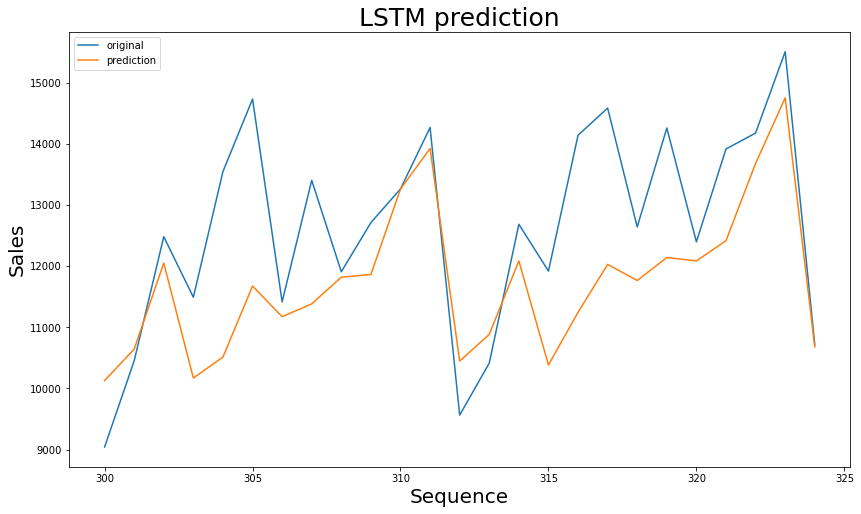

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 13ms/step - loss: 0.1121 - mae: 0.2530


[0.11208631843328476, 0.2530304193496704]